# DMML(2025) Assignment 3 submission for

1) Hemadri Shekhar Das (MCS202405)

2) Lucky Mathias Kispotta (MCS202411)

# 1) Import all necessary packages

# K-Means for the Fashion MNIST dataset


In [52]:
import os
import time as t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import io, transform
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

TI = t.time()

import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix

import tensorflow as tf

# 2) Load, Split and Visualize the data

(55000, 28, 28)
float64


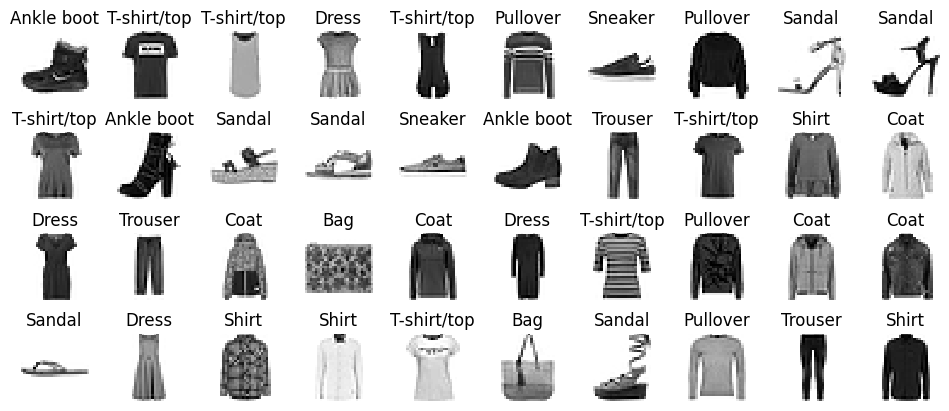

In [53]:
# Load Fashion MNIST dataset from TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Split dataset into training, validation, and test
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalize the images by scaling pixel values to the range [0, 1]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

# Check the shape and data type
print(X_train.shape)
print(X_train.dtype)

# List of class names (labels)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Visualizing some sample images from the dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#3) Preprocess the data for the algorithm

20 random states are used to train the model and then choose the best model

In [54]:
# Flatten the images for K-means clustering
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Flatten the images into vectors
X_valid_flattened = X_valid.reshape(X_valid.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Initialize random states for K-means
random.seed(42)  # For reproducibility
rnd_states = random.sample(range(1, 5000), 21)
random.shuffle(rnd_states)

# K-means clustering setup
k_value = 10  # Since we have 10 classes in Fashion MNIST

# Store the best results
best_rnd_st = None
best_kmn = None
best_kmn_pred = None
best_acc = 0

#4) Define a function to map cluster labels to true labels

In [55]:
# Map KMeans cluster labels to true labels
def map_cluster_labels_to_true_labels(y_true, kmn_pred, num_classes=10):
    # Create an array to store mapped cluster labels
    mapped_labels = np.zeros_like(kmn_pred)

    # For each cluster, find the most frequent true label
    for cluster_id in range(num_classes):
        # Get the indices of samples assigned to this cluster
        cluster_indices = np.where(kmn_pred == cluster_id)[0]

        # If the cluster contains any samples, find the most common true label
        if len(cluster_indices) > 0:
            most_common_label = np.bincount(y_true[cluster_indices]).argmax()
            # Assign the most common label to all samples in this cluster
            mapped_labels[cluster_indices] = most_common_label

    return mapped_labels


#5) Main K-Means Code

Random state: 4838, Silhouette Score: 0.1396, Accuracy: 0.5868
Random state: 2007, Silhouette Score: 0.1400, Accuracy: 0.5614
Random state: 3457, Silhouette Score: 0.1533, Accuracy: 0.5582
Random state: 1906, Silhouette Score: 0.1448, Accuracy: 0.5584
Random state: 4140, Silhouette Score: 0.1294, Accuracy: 0.5834
Random state: 4598, Silhouette Score: 0.1535, Accuracy: 0.5586
Random state: 205, Silhouette Score: 0.1572, Accuracy: 0.5444
Random state: 261, Silhouette Score: 0.1375, Accuracy: 0.5462
Random state: 1829, Silhouette Score: 0.1339, Accuracy: 0.5750
Random state: 1144, Silhouette Score: 0.1377, Accuracy: 0.5586
Random state: 840, Silhouette Score: 0.1335, Accuracy: 0.5974
Random state: 2254, Silhouette Score: 0.1447, Accuracy: 0.5722
Random state: 913, Silhouette Score: 0.1533, Accuracy: 0.5584
Random state: 218, Silhouette Score: 0.1375, Accuracy: 0.5590
Random state: 245, Silhouette Score: 0.1418, Accuracy: 0.5776
Random state: 713, Silhouette Score: 0.1448, Accuracy: 0.5584

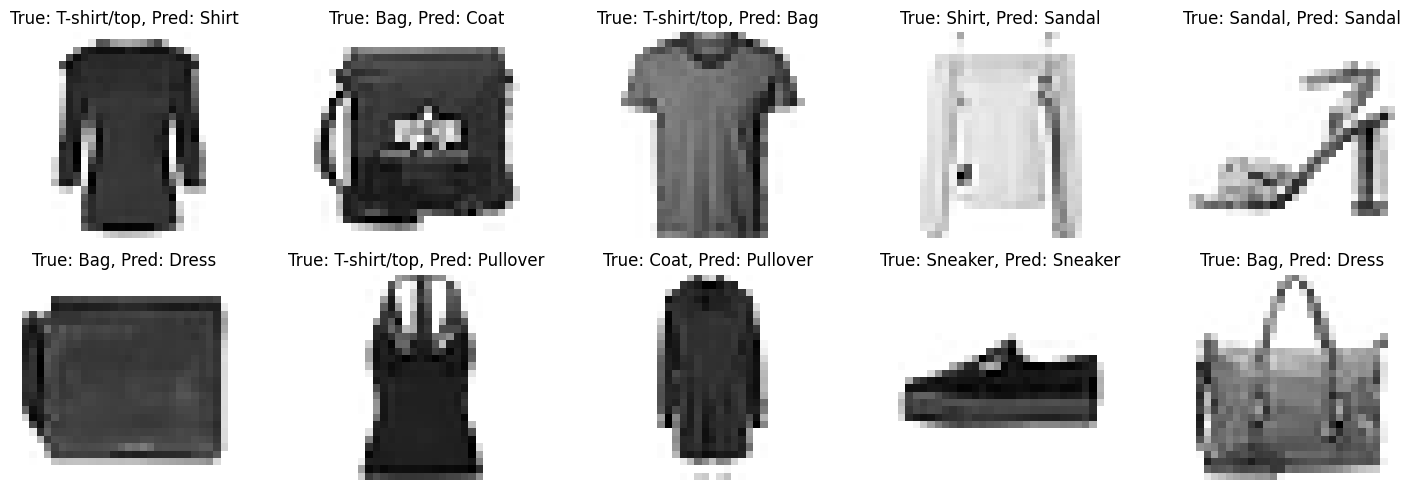

In [56]:
# Loop over random states for K-means clustering
for rnd_st in rnd_states:
    # Initialize KMeans with k clusters
    kmn = KMeans(n_clusters=k_value, random_state=rnd_st)

    # Fit K-means model on flattened training data
    kmn.fit(X_train_flattened)

    # Predict the cluster labels for validation set
    kmn_pred = kmn.predict(X_valid_flattened)

    # Calculate silhouette score
    score = silhouette_score(X_valid_flattened, kmn_pred)

    kmn_pred_mapped = map_cluster_labels_to_true_labels(y_valid, kmn_pred)

    # Evaluate performance
    acc = accuracy_score(y_valid, kmn_pred_mapped)
    kmn_rpt = classification_report(y_valid, kmn_pred_mapped, output_dict=True, zero_division=1)
    conf = dict(zip(class_names, multilabel_confusion_matrix(y_valid, kmn_pred_mapped)))

    # Update best model if accuracy improves
    if acc > best_acc:
        best_rnd_st = rnd_st
        best_kmn = kmn
        best_kmn_pred = kmn_pred
        best_acc = acc
        best_kmn_rpt = kmn_rpt

    # Print silhouette score and accuracy for each random state
    print(f"Random state: {rnd_st}, Silhouette Score: {score:.4f}, Accuracy: {acc:.4f}")

# Output the best results
print(f"\nBest random state: {best_rnd_st}")
print(f"Best accuracy: {best_acc}\n")
print(f"Classification report:\n{pd.DataFrame(best_kmn_rpt).transpose()}")

# Plot the best clustering result (first 10 validation images with true and predicted labels)
num_images = 10
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)  # 2 rows and 5 columns
    plt.imshow(X_valid[i], cmap='binary')  # Reshape back to 28x28 for visualization
    plt.title(f"True: {class_names[y_valid[i]]}, Pred: {class_names[best_kmn_pred[i]]}")
    plt.axis('off')

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


# K-Means for the Overhead MNIST dataset

# 1) Import all necessary packages

In [57]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
datamunge_overheadmnist_path = kagglehub.dataset_download('datamunge/overheadmnist')

print('Data source import complete.')
print(f"Dataset downloaded to: {datamunge_overheadmnist_path}")
print(os.listdir(datamunge_overheadmnist_path))

import os
import time as t
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import io, transform
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

TI = t.time()

import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix

Data source import complete.
Dataset downloaded to: /kaggle/input/overheadmnist
['test-images-idx3-ubyte', 'version2', 'test-labels-idx1-ubyte', 'train-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'overhead']


# 2) Define some helper functions

In [58]:
def timer(ti, tf, rnd=2):
    # Returns elapsed time in sec, min
    dif = tf - ti
    sc = round(dif, rnd)
    print('{} sec'.format(sc))
    return sc


def norm_pic(pic):
    # Returns normalized array as type float32
    pic_mean = pic.mean()
    pic_max_min = pic.max() - pic.min()

    # Avoid division by zero
    if pic_max_min == 0:
        return pic.astype('float32')  # Return pic as is if max == min

    return ((pic - pic_mean) / pic_max_min).astype('float32')

#3) Prepare Overhead MNIST dataset

In [59]:
# Define base path for file storage
base_path = '/kaggle/input/overheadmnist/overhead/'
train_path = base_path + 'training/'

# Read data files
train = pd.read_csv(base_path + 'train.csv')
labels = pd.read_csv(base_path + 'labels.csv')
classes = pd.read_csv(base_path + 'classes.csv')

# Process labels for train and test datasets
tr_labels = labels[labels['dataset'] == 'train'].drop('dataset', axis=1)[['image', 'class', 'label']]
ts_labels = labels[labels['dataset'] == 'test'].drop('dataset', axis=1)[['image', 'class', 'label']]

# Create master DataFrames by joining train data with labels
master_tr = tr_labels.join(train.drop('label', axis=1))
master_ts = ts_labels.join(train.drop('label', axis=1))


# Define the correct base path for writable directory
output_path = '/content/'

# Save master DataFrames for future use
master_tr.to_csv(output_path + 'master_tr.csv')
master_ts.to_csv(output_path + 'master_ts.csv')

# You can print the path where the files were saved for verification
print("Files saved to: ", output_path)

# Save master DataFrames for future use in Google Drive
#master_tr.to_csv(base_path + 'master_tr.csv')
#master_ts.to_csv(base_path + 'master_ts.csv')

# Reference list of classes
clss_lst = classes['class'].values

# Store useful values
tot_pics = len(train)
num_classes = len(classes)

# Initialize results dictionary for future use
results_dict = {}

# Timing operation
TI = t.time()
_ = timer(TI, t.time())

# Define the class names for the Overhead MNIST dataset
class_names = [
    'cars', 'harbor', 'helicopter', 'oil_gas_field', 'parking_lot',
    'plane', 'runway_mark', 'ship', 'stadium', 'storage_tank'
]


Files saved to:  /content/
0.0 sec


#4) Create training data and validation set

In [60]:
# Normalize the pixel values of images in the train dataset
X = norm_pic(train.drop('label', axis=1).values)

# Reshape X to (num_samples, 28, 28, 1) for CNN input (if you're working with image data)
#X = X.reshape(-1, 28, 28, 1)

# Create categorical labels
y = train['label']

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=rnd_st)

# Print shapes for confirmation
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (6815, 784)
X_val shape: (1704, 784)
y_train shape: (6815,)
y_val shape: (1704,)


#5) Define a function to map cluster labels to true labels

In [61]:
# Map KMeans cluster labels to true labels
def map_cluster_labels_to_true_labels(y_true, kmn_pred, num_classes=10):
    # Create an array to store mapped cluster labels
    mapped_labels = np.zeros_like(kmn_pred)

    # For each cluster, find the most frequent true label
    for cluster_id in range(num_classes):
        # Get the indices of samples assigned to this cluster
        cluster_indices = np.where(kmn_pred == cluster_id)[0]

        # If the cluster contains any samples, find the most common true label
        if len(cluster_indices) > 0:
            most_common_label = np.bincount(y_true.iloc[cluster_indices]).argmax()
            # Assign the most common label to all samples in this cluster
            mapped_labels[cluster_indices] = most_common_label

    return mapped_labels


#6) Selecting Random States

250 random states are generated and the code is then run to find the best model.



Since the code was already run on some smaller sets and 42 and 2001 produced some of the best models, so they were added separately to the set of random states

In [62]:
# Generate 100 random state values, including 42 and 2001
random.seed(42)  # For reproducibility
rnd_states = random.sample(range(1, 10000), 248)  # 248 random values between 1 and 9999
rnd_states += [42, 2001]  # Add the specific values 42 and 2001 to the list

# Total 250 random values

random.shuffle(rnd_states)  # Shuffle to mix the fixed and random values

k_value = 10

# Store the best results
best_rnd_st = None
best_kmn = None
best_kmn_pred = None
best_acc = 0
clust_empty = 0

# Flatten the data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

#7) Main K-Means Code

Random state: 712, Silhouette Score: 0.0578, Accuracy: 0.3545
Random state: 1520, Silhouette Score: 0.0586, Accuracy: 0.3914
Random state: 9198, Silhouette Score: 0.0587, Accuracy: 0.3979
Random state: 8086, Silhouette Score: 0.0582, Accuracy: 0.3727
Random state: 7261, Silhouette Score: 0.0517, Accuracy: 0.3627
Random state: 2616, Silhouette Score: 0.0495, Accuracy: 0.3609
Random state: 5156, Silhouette Score: 0.0572, Accuracy: 0.3656
Random state: 4564, Silhouette Score: 0.0538, Accuracy: 0.3580
Random state: 6573, Silhouette Score: 0.0621, Accuracy: 0.4014
Random state: 1585, Silhouette Score: 0.0525, Accuracy: 0.3785
Random state: 526, Silhouette Score: 0.0604, Accuracy: 0.3685
Random state: 8835, Silhouette Score: 0.0601, Accuracy: 0.3697
Random state: 5414, Silhouette Score: 0.0602, Accuracy: 0.3762
Random state: 7528, Silhouette Score: 0.0366, Accuracy: 0.3398
Random state: 189, Silhouette Score: 0.0407, Accuracy: 0.3609
Random state: 7360, Silhouette Score: 0.0438, Accuracy: 0.

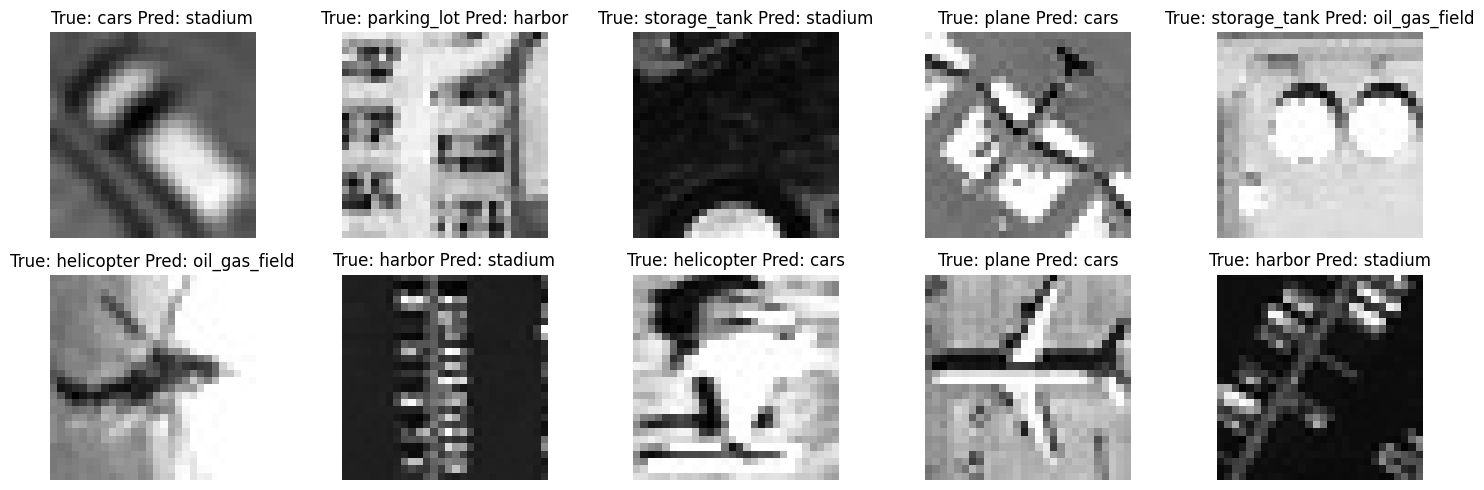

In [63]:
# Loop over k values
# Loop over random states
for rnd_st in rnd_states:
  clust_empty = 0  # Reset empty cluster counter for each k value
  # Initialize KMeans with k clusters
  kmn = KMeans(k_value, random_state=rnd_st)

  # Fit the KMeans model on the flattened training data
  st = t.time()
  kmn.fit(X_train_flattened)

  # Predict the cluster labels for the validation set
  kmn_pred = kmn.predict(X_val_flattened)

  # Calculate silhouette score
  score = silhouette_score(X_val_flattened, kmn_pred)
  # Map KMeans predictions to true labels
  kmn_pred_mapped = map_cluster_labels_to_true_labels(y_val, kmn_pred)

  # Evaluate performance with the mapped labels
  acc = accuracy_score(y_val, kmn_pred_mapped)
  kmn_rpt = classification_report(y_val, kmn_pred_mapped, output_dict=True, zero_division=1)
  conf = dict(zip(clss_lst, multilabel_confusion_matrix(y_val, kmn_pred_mapped)))


  # Update the best model if this one has a higher accuracy score
  if acc > best_acc:
      best_rnd_st = rnd_st
      best_kmn = kmn
      best_kmn_pred = kmn_pred
      best_acc = acc
      # Save results in the results_dict
      kmn_results = pd.DataFrame(kmn_rpt).T
      results_dict['K-Means'] = {
          'accuracy': acc,
          'classification report': kmn_rpt,
          'confusion matrix': conf
      }

  # Print silhouette score and accuracy for each random state and k value
  print(f"Random state: {rnd_st}, Silhouette Score: {score:.4f}, Accuracy: {acc:.4f}")

# Display the best silhouette score, random state
print(f"\nBest random state: {best_rnd_st}")

# Print the results
print('accuracy: {}\n\n{}'.format(best_acc, kmn_results))

# Plot the best clustering result (first 10 images with true and predicted labels)
num_images = 10
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)  # 2 rows and 5 columns
    plt.imshow(X_val[i].reshape(28, 28), cmap='gray')  # Reshape back to 28x28 for visualization
    true_label = class_names[y_val.iloc[i]]
    pred_label = class_names[best_kmn_pred[i]]
    plt.title(f"True: {true_label} Pred: {pred_label}")  # Display true and predicted labels
    plt.axis('off')  # Hide axes

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()
